In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**1) Leer los datos del IPC.**

In [3]:
ipc_df = pd.read_csv("https://www.indec.gob.ar/ftp/cuadros/economia/serie_ipc_aperturas.csv",encoding='latin1', delimiter=';')

In [4]:
ipc_df.Periodo.unique()

array([201612, 201701, 201702, 201703, 201704, 201705, 201706, 201707,
       201708, 201709, 201710, 201711, 201712, 201801, 201802, 201803,
       201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907,
       201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003,
       202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011,
       202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107,
       202108, 202109, 202110, 202111, 202112, 202201, 202202, 202203,
       202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211,
       202212, 202301, 202302, 202303, 202304, 202305, 202306, 202307,
       202308, 202309, 202310, 202311, 202312, 202401, 202402, 202403,
       202404, 202405, 202406], dtype=int64)

**2) Modificar la tabla** para que cumpla con la definición de tidy data: cada variable debe ser una columna (Apertura, Fecha e Indice).

In [5]:
ipc_df.head()

,Codigo,Descripcion_aperturas,Clasificador,Periodo,Indice_IPC,v_m_IPC,v_i_a_IPC,Region
0,0,Nivel general,Nivel general y divisiones COICOP,201612,100,NaN,NaN,Pampeana
1,0,Nivel general,Nivel general y divisiones COICOP,201612,100,NaN,NaN,Noreste
2,0,Nivel general,Nivel general y divisiones COICOP,201612,100,NaN,NaN,Noroeste
3,0,Nivel general,Nivel general y divisiones COICOP,201612,100,NaN,NaN,Cuyo
4,0,Nivel general,Nivel general y divisiones COICOP,201612,100,NaN,NaN,Patagonia


**3)** Convertir la **variable de fecha** al formato date-time y extraer el año y el mes


In [6]:
df = ipc_df

In [7]:

# Convertir la columna 'Periodo' a string y luego a datetime
df['Periodo'] = pd.to_datetime(df['Periodo'].astype(str) + '01', format='%Y%m%d')

# Extraer el año y el mes
df['Año'] = df['Periodo'].dt.year
df['Mes'] = df['Periodo'].dt.month

# Mostrar el DataFrame resultante
print(df)

       Codigo                              Descripcion_aperturas  \
0           0                                      Nivel general   
1           0                                      Nivel general   
2           0                                      Nivel general   
3           0                                      Nivel general   
4           0                                      Nivel general   
...       ...                                                ...   
23655  01.2.1                            Café, té, yerba y cacao   
23656  01.2.2          Aguas minerales, bebidas gaseosas y jugos   
23657  04.1.1                            Alquiler de la vivienda   
23658  06.4.1                                 Gastos de prepagas   
23659  07.2.2  Combustibles y lubricantes para vehículos de u...   

                            Clasificador    Periodo Indice_IPC v_m_IPC  \
0      Nivel general y divisiones COICOP 2016-12-01        100     NaN   
1      Nivel general y divisiones C

**4)** Calcular el **indice promedio, mediano y maximo** por año para cada nivel de apertura.

In [17]:
# Verificar el tipo de datos de la columna
print(df['Indice_IPC'].dtype)

# Verificar valores únicos en la columna
print(df['Indice_IPC'].unique())

object
['100' '101,7874' '101,6727' ... '2869,3539' '5356,5928' '5795,6996']


In [18]:
# Reemplazar comas por puntos en la columna 'Indice_IPC' y convertir a tipo numérico
df['Indice_IPC'] = df['Indice_IPC'].str.replace(',', '.').astype(float)

# Agrupar por Año y Descripcion_aperturas y calcular estadísticas
grouped = df.groupby(['Año', 'Descripcion_aperturas'])['Indice_IPC'].agg(
    Promedio='mean',
    Mediano='median',
    Maximo='max'
).reset_index()

# Mostrar el DataFrame resultante
print(grouped)

      Año                              Descripcion_aperturas     Promedio  \
0    2016                          Aceites, grasas y manteca   100.000000   
1    2016                           Adquisición de vehículos   100.000000   
2    2016          Aguas minerales, bebidas gaseosas y jugos   100.000000   
3    2016                                          Alimentos   100.000000   
4    2016                 Alimentos y bebidas no alcohólicas   100.000000   
..    ...                                                ...          ...   
400  2024                                             Tabaco  3529.112222   
401  2024                                         Transporte  6115.911800   
402  2024                                 Transporte público  4858.753725   
403  2024                   Verduras, tubérculos y legumbres  6868.807178   
404  2024  Vivienda, agua, electricidad, gas y otros comb...  4134.654506   

        Mediano      Maximo  
0     100.00000    100.0000  
1     100.00000

**5) Graficar**

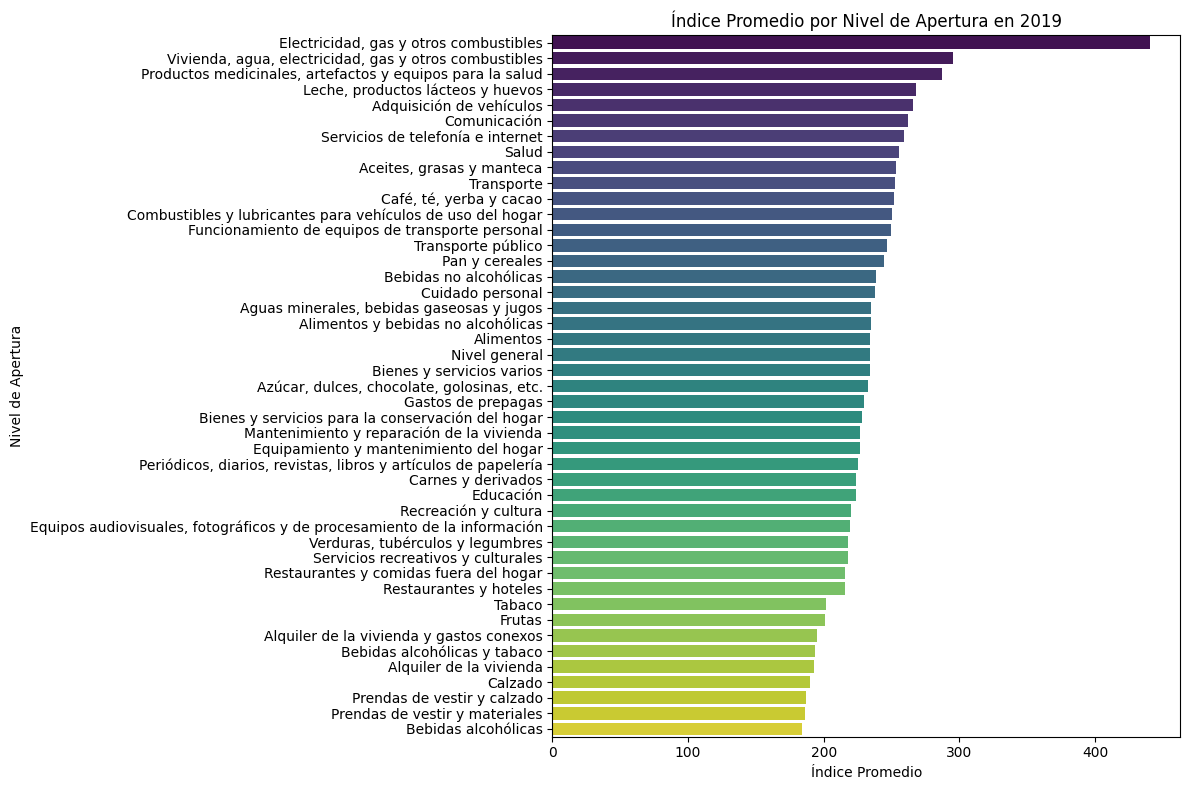

In [26]:
import seaborn as sns
grouped = grouped.query("Año == 2019")
# Ordenar los datos por el índice promedio
filtered_data = grouped.sort_values(by='Promedio', ascending=False)

plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales
sns.barplot(data=filtered_data, y='Descripcion_aperturas', x='Promedio', palette='viridis', ci=None)

plt.title(f'Índice Promedio por Nivel de Apertura en {2019}')
plt.xlabel('Índice Promedio')
plt.ylabel('Nivel de Apertura')
plt.tight_layout()
plt.show()